# pandas datetime object
## Agenda

- `datetime`ライブラリ
- 文字列を日時に変換
- DataFrameと日時処理


### Import

In [1]:
from datetime import datetime
from pandas.util.testing import assert_frame_equal
import pandas as pd
import numpy as np
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from itertools import accumulate

/Users/ryonak/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


### Pandas version

In [2]:
pd.__version__

'1.0.3'

### 関数

In [3]:
def memory_checker():
    print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
    print(" ------------------------------------ ")
    for var_name in globals():
        if not var_name.startswith("_"):
            print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

## 1. Pythonのdatetimeオブジェクト

current timestampの出力

In [4]:
now = datetime.now()
print(now)

2020-07-06 11:55:39.749294


datetimeの引き算

In [5]:
t1 = datetime(1970, 1, 1)
diff = now - t1
print(diff)

18449 days, 11:55:39.749294


In [6]:
print(type(diff))

<class 'datetime.timedelta'>


## 2. datetimeへの変換

object型の文字列を`datetime`型に変換するには、`to_datetime`関数を使う。

In [7]:
### load the ebola dataset

url = 'https://raw.githubusercontent.com/RyoNakagami/pandas_for_everyone/master/data/country_timeseries.csv'
ebola = pd.read_csv(url)
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [8]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

### datetime objectへの変換

In [9]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'],
                                  format = '%m/%d/%Y')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31


In [10]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### 日時フォーマット

|指定子|意味|例|
|---|---|---|
|`%a`|曜日の省略形|Sun, Mon, ..., Sat|
|`%A`|曜日の名前|Sunday, Monday, ..., Saturday|
|`%w`|数字で表す曜日（日曜日は0）|0, 1, 2, ..., 6|
|`%d`|その月の日（2桁）|01, 02, ..., 31|
|`%b`|月の省略形|Jan, Feb, ..., Dec|
|`%B`|月の名前|January, February, ..., December|
|`%m`|2桁の数字で表す月|01, 02, ..., 12|
|`%y`|2桁表記の年（西暦）|01,02,...,99|
|`%Y`|4桁表記の年（西暦）|0000,..., 9999|
|`%H`|24時間表記の時|01, ..., 23|
|`%I`|12時間表記の時||01, ..., 12|
|`%P`|AM or PM|AM, PM|
|`%M`|分|00, 01, ..., 59|
|`%S`|秒|00, 01, ..., 59|


`parse_dates`で日付に関するカラムを指定して、dataをloadする

In [11]:
url = 'https://raw.githubusercontent.com/RyoNakagami/pandas_for_everyone/master/data/country_timeseries.csv'
ebola = pd.read_csv(url, parse_dates = [0])
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


### 日付のコンポーネントを抽出する

In [12]:
d = pd.to_datetime('2019-06-01')
print(d)

2019-06-01 00:00:00


In [13]:
print(type(d))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
print(d.year)

2019


In [15]:
print(d.month)

6


In [16]:
print(d.day)

1


### 日付の計算とtimedelta

In [17]:
ebola['Date'] - ebola['Date'].min()

0     289 days
1     288 days
2     287 days
3     286 days
4     284 days
        ...   
117     5 days
118     4 days
119     3 days
120     2 days
121     0 days
Name: Date, Length: 122, dtype: timedelta64[ns]

### datetimeのメソッド

In [18]:
bank_data = 'https://raw.githubusercontent.com/RyoNakagami/pandas_for_everyone/master/data/banklist.csv'
banks = pd.read_csv(bank_data, 
                    parse_dates = [5, 6])
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18


次に銀行が閉鎖した四半期と年を取り出す。

In [19]:
banks['closing_quarter'], banks['closing_year'] = \
        (banks['Closing Date'].dt.quarter,
         banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


この後、それぞれの年にいくつ銀行が閉鎖したかを計算する

In [20]:
closing_year = banks.groupby(['closing_year']).size()
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

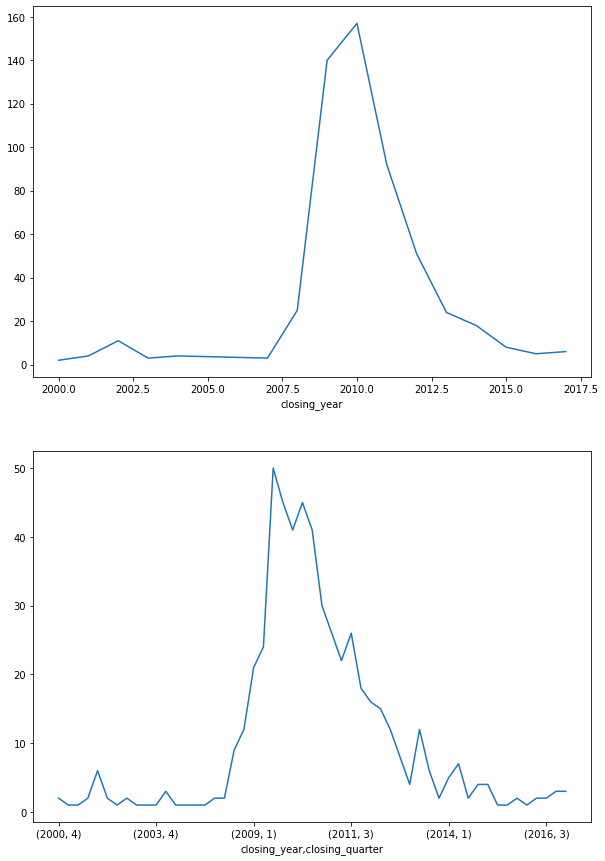

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (10, 15))
closing_year.plot(ax = ax[0])
closing_year_q.plot(ax = ax[1])

### 日時型、日付型への変換

In [22]:
URL = "https://raw.githubusercontent.com/ghmagazine/awesomebook/master/data/reserve.csv "
reserved_df = pd.read_csv(URL, parse_dates = [3])
reserved_df.head()

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,4,194400
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,3,68100


In [23]:
reserved_df['chekin_datetime'] = pd.to_datetime(reserved_df['checkin_date'] + reserved_df['checkin_time'],
                                               format = '%Y-%m-%d%H:%M:%S')
reserved_df['chekin_datetime'].dt.date

0       2016-03-26
1       2016-07-20
2       2016-10-19
3       2017-03-29
4       2017-09-22
           ...    
4025    2017-07-10
4026    2017-10-09
4027    2018-04-02
4028    2016-05-10
4029    2016-07-06
Name: chekin_datetime, Length: 4030, dtype: object

### datetime型から日時要素を取り出す

In [24]:
reserved_df['year'] = reserved_df['reserve_datetime'].dt.year
reserved_df['month'] = reserved_df['reserve_datetime'].dt.month
reserved_df['day'] = reserved_df['reserve_datetime'].dt.day
reserved_df['dayofweek'] = reserved_df['reserve_datetime'].dt.dayofweek
reserved_df['hour'] = reserved_df['reserve_datetime'].dt.hour
reserved_df['minute'] = reserved_df['reserve_datetime'].dt.minute
reserved_df['second'] = reserved_df['reserve_datetime'].dt.second
reserved_df['reserve_datetime_str'] = reserved_df['reserve_datetime'].dt.strftime('%Y-%m-%d %H:%M%S')
reserved_df.head()

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price,chekin_datetime,year,month,day,dayofweek,hour,minute,second,reserve_datetime_str
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200,2016-03-26 10:00:00,2016,3,6,6,13,9,42,2016-03-06 13:0942
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600,2016-07-20 11:30:00,2016,7,16,5,23,39,55,2016-07-16 23:3955
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600,2016-10-19 09:00:00,2016,9,24,5,10,3,17,2016-09-24 10:0317
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,4,194400,2017-03-29 11:00:00,2017,3,8,2,3,20,10,2017-03-08 03:2010
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,3,68100,2017-09-22 10:30:00,2017,9,5,1,19,50,37,2017-09-05 19:5037


### 年別のリザーブ件数の累積和をリザーブdatetime順にカウントする

In [25]:
reserved_df.shape

(4030, 18)

In [26]:
reserved_df['tmp_order'] = 1
reserved_df['order_no'] = reserved_df.sort_values('reserve_datetime').groupby('year')['tmp_order'].transform(accumulate)
reserved_df.head()

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price,chekin_datetime,year,month,day,dayofweek,hour,minute,second,reserve_datetime_str,tmp_order,order_no
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200,2016-03-26 10:00:00,2016,3,6,6,13,9,42,2016-03-06 13:0942,1,360
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600,2016-07-20 11:30:00,2016,7,16,5,23,39,55,2016-07-16 23:3955,1,1381
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600,2016-10-19 09:00:00,2016,9,24,5,10,3,17,2016-09-24 10:0317,1,1786
3,r4,h_214,c_1,2017-03-08 03:20:10,2017-03-29,11:00:00,2017-03-30,4,194400,2017-03-29 11:00:00,2017,3,8,2,3,20,10,2017-03-08 03:2010,1,349
4,r5,h_16,c_1,2017-09-05 19:50:37,2017-09-22,10:30:00,2017-09-23,3,68100,2017-09-22 10:30:00,2017,9,5,1,19,50,37,2017-09-05 19:5037,1,1050


## 3. 株価データの日付処理

In [27]:
tesla = pdr.get_data_yahoo('TSLA')
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-26,995.000000,954.869995,994.780029,959.739990,8854900,959.739990
2020-06-29,1010.000000,948.520020,969.010010,1009.349976,9026400,1009.349976
2020-06-30,1087.689941,1003.729980,1006.500000,1079.810059,16918500,1079.810059
2020-07-01,1135.329956,1080.500000,1083.000000,1119.630005,13326900,1119.630005
2020-07-02,1228.000000,1185.599976,1221.479980,1208.660034,17250100,1208.660034


In [28]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-07-07 to 2020-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


### DatetimeIndex objectを用いてデータ抽出

In [29]:
tesla.index

DatetimeIndex(['2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20',
               ...
               '2020-06-19', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

2015年のデータを抽出

In [30]:
tesla['2015'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-07,275.200012,260.769989,275.000000,267.880005,6105100,267.880005
2015-07-08,260.799988,254.309998,259.320007,254.960007,6221100,254.960007
2015-07-09,262.950012,256.790009,259.079987,257.920013,3334100,257.920013
2015-07-10,263.000000,257.820007,262.220001,259.149994,2610900,259.149994
2015-07-13,262.549988,256.049988,262.250000,262.160004,2960300,262.160004


2016年6月のデータを抽出

In [31]:
tesla['2016-06'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,222.399994,216.889999,221.479996,219.559998,2982700,219.559998
2016-06-02,219.910004,217.110001,219.589996,218.960007,2032800,218.960007
2016-06-03,221.940002,218.009995,220.000000,218.990005,2229000,218.990005
2016-06-06,220.899994,215.449997,218.000000,220.679993,2249500,220.679993
2016-06-07,234.440002,221.520004,222.240005,232.339996,6213600,232.339996


### `TimedeltaIndex` objectの設定

In [32]:
tesla_2 = tesla.reset_index()
tesla_2.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-07-07,275.200012,260.769989,275.000000,267.880005,6105100,267.880005
1,2015-07-08,260.799988,254.309998,259.320007,254.960007,6221100,254.960007
2,2015-07-09,262.950012,256.790009,259.079987,257.920013,3334100,257.920013
3,2015-07-10,263.000000,257.820007,262.220001,259.149994,2610900,259.149994
4,2015-07-13,262.549988,256.049988,262.250000,262.160004,2960300,262.160004


In [33]:
tesla_2['ref_date'] = tesla_2['Date'] - tesla_2['Date'].min()
tesla_2 = tesla_2.set_index('ref_date')
tesla_2.head()

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
0 days,2015-07-07,275.200012,260.769989,275.000000,267.880005,6105100,267.880005
1 days,2015-07-08,260.799988,254.309998,259.320007,254.960007,6221100,254.960007
2 days,2015-07-09,262.950012,256.790009,259.079987,257.920013,3334100,257.920013
3 days,2015-07-10,263.000000,257.820007,262.220001,259.149994,2610900,259.149994
6 days,2015-07-13,262.549988,256.049988,262.250000,262.160004,2960300,262.160004


In [34]:
tesla_2.loc['0 days': '10 days']

,Date,High,Low,Open,Close,Volume,Adj Close
ref_date,,,,,,,
0 days,2015-07-07,275.200012,260.769989,275.000000,267.880005,6105100,267.880005
1 days,2015-07-08,260.799988,254.309998,259.320007,254.960007,6221100,254.960007
2 days,2015-07-09,262.950012,256.790009,259.079987,257.920013,3334100,257.920013
3 days,2015-07-10,263.000000,257.820007,262.220001,259.149994,2610900,259.149994
6 days,2015-07-13,262.549988,256.049988,262.250000,262.160004,2960300,262.160004
7 days,2015-07-14,265.989990,260.510010,262.100006,265.649994,1907600,265.649994
8 days,2015-07-15,267.489990,262.079987,266.739990,263.140015,2021600,263.140015
9 days,2015-07-16,267.200012,263.160004,264.220001,266.679993,1616000,266.679993
10 days,2015-07-17,275.540009,268.250000,272.500000,274.660004,5004100,274.660004


## 4. 周期

2017年の毎月の第一木曜日の抽出

In [35]:
pd.date_range('2017-01-01', '2017-12-31', freq = 'WOM-1THU')

DatetimeIndex(['2017-01-05', '2017-02-02', '2017-03-02', '2017-04-06',
               '2017-05-04', '2017-06-01', '2017-07-06', '2017-08-03',
               '2017-09-07', '2017-10-05', '2017-11-02', '2017-12-07'],
              dtype='datetime64[ns]', freq='WOM-1THU')

2017年の毎月の第三金曜日の抽出

In [36]:
pd.date_range('2017-01-01', '2017-12-31', freq = 'WOM-3FRI')

DatetimeIndex(['2017-01-20', '2017-02-17', '2017-03-17', '2017-04-21',
               '2017-05-19', '2017-06-16', '2017-07-21', '2017-08-18',
               '2017-09-15', '2017-10-20', '2017-11-17', '2017-12-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 5. 値のシフト

各列で最も早い有効なdate indexを取得する

In [37]:
url = 'https://raw.githubusercontent.com/RyoNakagami/pandas_for_everyone/master/data/country_timeseries.csv'
ebola = pd.read_csv(url, parse_dates = [0])
ebola = ebola.set_index('Date')
ebola.apply(pd.Series.last_valid_index)

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [38]:
shift_values = ebola.apply(pd.Series.last_valid_index) - ebola.index.min()
shift_values

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

次にebola outbreakの開始日を各国ベースで調整したいとする

In [39]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted
shifted_df = pd.DataFrame(ebola_dict)
shifted_df.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
shifted_df[ebola.columns].reset_index(drop = True)

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,289,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,284,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
118,4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


このDataFrameの`Day`は各国単位でのoutbreakからの日数を表している